##### Steps for reading in dataset (following download), initial QC, dim reduction/clustering and saving out the myeloid cluster for **GSE162025**

file previously downloaded:
GSE162025_RAW.tar

unzipped using 
``` bash
tar -xvf GSE162025_RAW.tar
```

This gives the following files:                         
* GSM4929845_NPC_SC_1802_PBMC_count.csv.gz
* GSM4929846_NPC_SC_1802_Tumor_count.csv.gz
* GSM4929847_NPC_SC_1805_PBMC_count.csv.gz
* GSM4929848_NPC_SC_1805_Tumor_count.csv.gz
* GSM4929849_NPC_SC_1806_PBMC_count.csv.gz
* GSM4929850_NPC_SC_1806_Tumor_count.csv.gz
* GSM4929851_NPC_SC_1807_PBMC_count.csv.gz
* GSM4929852_NPC_SC_1807_Tumor_count.csv.gz
* GSM4929853_NPC_SC_1808_PBMC_count.csv.gz
* GSM4929854_NPC_SC_1808_Tumor_count.csv.gz
* GSM4929855_NPC_SC_1810_PBMC_count.csv.gz
* GSM4929856_NPC_SC_1810_Tumor_count.csv.gz
* GSM4929857_NPC_SC_1811_PBMC_count.csv.gz
* GSM4929858_NPC_SC_1811_Tumor_count.csv.gz
* GSM4929859_NPC_SC_1813_PBMC_count.csv.gz
* GSM4929860_NPC_SC_1813_Tumor_count.csv.gz
* GSM4929861_NPC_SC_1815_PBMC_count.csv.gz
* GSM4929862_NPC_SC_1815_Tumor_count.csv.gz
* GSM4929863_NPC_SC_1816_PBMC_count.csv.gz
* GSM4929864_NPC_SC_1816_Tumor_count.csv.gz


In [1]:
#set wd
getwd()
setwd('/scratch/user/s4436039/scdata/GSE162025')
getwd()

[1] "/scratch/user/s4436039/Nikita-project"

[1] "/scratch/user/s4436039/scdata/GSE162025"

In [2]:
#Load packages
library(dplyr)
library(Seurat)
library(patchwork)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect




In [5]:
#load all datasets
NPC02.data <- read.csv("/scratch/user/s4436039/scdata/GSE162025/GSM4929846_NPC_SC_1802_Tumor_count.csv.gz")
NPC05.data <- read.csv("/scratch/user/s4436039/scdata/GSE162025/GSM4929848_NPC_SC_1805_Tumor_count.csv.gz")
NPC06.data <- read.csv("/scratch/user/s4436039/scdata/GSE162025/GSM4929850_NPC_SC_1806_Tumor_count.csv.gz")
NPC07.data <- read.csv("/scratch/user/s4436039/scdata/GSE162025/GSM4929852_NPC_SC_1807_Tumor_count.csv.gz")
NPC08.data <- read.csv("/scratch/user/s4436039/scdata/GSE162025/GSM4929854_NPC_SC_1808_Tumor_count.csv.gz")
NPC10.data <- read.csv("/scratch/user/s4436039/scdata/GSE162025/GSM4929856_NPC_SC_1810_Tumor_count.csv.gz")
NPC11.data <- read.csv("/scratch/user/s4436039/scdata/GSE162025/GSM4929858_NPC_SC_1811_Tumor_count.csv.gz")
NPC13.data <- read.csv("/scratch/user/s4436039/scdata/GSE162025/GSM4929860_NPC_SC_1813_Tumor_count.csv.gz")
NPC15.data <- read.csv("/scratch/user/s4436039/scdata/GSE162025/GSM4929862_NPC_SC_1815_Tumor_count.csv.gz")
NPC16.data <- read.csv("/scratch/user/s4436039/scdata/GSE162025/GSM4929864_NPC_SC_1816_Tumor_count.csv.gz")

In [9]:
head(colnames(NPC13.data))

[1] "NPC_SC_1813_Tumor_cDNA_ACATGGTGTCTAGGTT"
[2] "NPC_SC_1813_Tumor_cDNA_ACTGATGTCACAACGT"
[3] "NPC_SC_1813_Tumor_cDNA_CACTCCAGTCTCCACT"
[4] "NPC_SC_1813_Tumor_cDNA_CAGAGAGCATAAAGGT"
[5] "NPC_SC_1813_Tumor_cDNA_CAGTCCTGTGCAGACA"
[6] "NPC_SC_1813_Tumor_cDNA_CCTAAAGGTCTAGTGT"

In [10]:
#Add dataset info to colnames
colnames(NPC02.data) <- paste0("GSE162025_", colnames(NPC02.data))
colnames(NPC05.data) <- paste0("GSE162025_", colnames(NPC05.data))
colnames(NPC06.data) <- paste0("GSE162025_", colnames(NPC06.data))
colnames(NPC07.data) <- paste0("GSE162025_", colnames(NPC07.data))
colnames(NPC08.data) <- paste0("GSE162025_", colnames(NPC08.data))
colnames(NPC10.data) <- paste0("GSE162025_", colnames(NPC10.data))
colnames(NPC11.data) <- paste0("GSE162025_", colnames(NPC11.data))
colnames(NPC13.data) <- paste0("GSE162025_", colnames(NPC13.data))
colnames(NPC15.data) <- paste0("GSE162025_", colnames(NPC15.data))
colnames(NPC16.data) <- paste0("GSE162025_", colnames(NPC16.data))


In [11]:
head(colnames(NPC02.data))
head(colnames(NPC10.data))

[1] "GSE162025_npc_1802_tumor_CTGTTTATCACTCTTA"
[2] "GSE162025_npc_1802_tumor_AACCGCGAGTACGCGA"
[3] "GSE162025_npc_1802_tumor_AGAGCTTAGGCCATAG"
[4] "GSE162025_npc_1802_tumor_CAGCAGCTCGTCACGG"
[5] "GSE162025_npc_1802_tumor_CTCTGGTTCCGCGTTT"
[6] "GSE162025_npc_1802_tumor_GACGTGCCAAGTCATC"

[1] "GSE162025_NPC_SC_1810_Tumor_cDNA_ATCACGAGTTAGGGTG"
[2] "GSE162025_NPC_SC_1810_Tumor_cDNA_ATCTGCCGTATAGGTA"
[3] "GSE162025_NPC_SC_1810_Tumor_cDNA_CCCTCCTAGTACCGGA"
[4] "GSE162025_NPC_SC_1810_Tumor_cDNA_CCGGTAGTCGAGCCCA"
[5] "GSE162025_NPC_SC_1810_Tumor_cDNA_CCGTGGACACGTTGGC"
[6] "GSE162025_NPC_SC_1810_Tumor_cDNA_CCTAGCTGTGTTAAGA"

In [6]:
#create seperate seurat object for each sample
HFC1 <- CreateSeuratObject(counts = HFC1.data, project = "GSE223063", min.features = 200)
#add metadata to sample
HFC1@meta.data$sample_type <- "tumour"
HFC1@meta.data$cancer_type <- "Glioblastoma"
HFC1@meta.data$patient_id <- "1_HFC"
HFC1@meta.data$sample_id <- "GSE223063_HFC1"

In [7]:
#create seperate seurat object for each sample
HFC2 <- CreateSeuratObject(counts = HFC2.data, project = "GSE223063", min.features = 200)
#add metadata to sample
HFC2@meta.data$sample_type <- "tumour"
HFC2@meta.data$cancer_type <- "Glioblastoma"
HFC2@meta.data$patient_id <- "2_HFC"
HFC2@meta.data$sample_id <- "GSE223063_HFC2"

In [8]:
#create seperate seurat object for each sample
HFC3 <- CreateSeuratObject(counts = HFC3.data, project = "GSE223063", min.features = 200)
#add metadata to sample
HFC3@meta.data$sample_type <- "tumour"
HFC3@meta.data$cancer_type <- "Glioblastoma"
HFC3@meta.data$patient_id <- "3_HFC"
HFC3@meta.data$sample_id <- "GSE223063_HFC3"

In [9]:
#create seperate seurat object for each sample
LFC1 <- CreateSeuratObject(counts = LFC1.data, project = "GSE223063", min.features = 200)
#add metadata to sample
LFC1@meta.data$sample_type <- "tumour"
LFC1@meta.data$cancer_type <- "Glioblastoma"
LFC1@meta.data$patient_id <- "1_LFC"
LFC1@meta.data$sample_id <- "GSE223063_LFC1"

In [10]:
#create seperate seurat object for each sample
LFC2 <- CreateSeuratObject(counts = LFC2.data, project = "GSE223063", min.features = 200)
#add metadata to sample
LFC2@meta.data$sample_type <- "tumour"
LFC2@meta.data$cancer_type <- "Glioblastoma"
LFC2@meta.data$patient_id <- "2_LFC"
LFC2@meta.data$sample_id <- "GSE223063_LFC2"

In [11]:
#create seperate seurat object for each sample
LFC3 <- CreateSeuratObject(counts = LFC3.data, project = "GSE223063", min.features = 200)
#add metadata to sample
LFC3@meta.data$sample_type <- "tumour"
LFC3@meta.data$cancer_type <- "Glioblastoma"
LFC3@meta.data$patient_id <- "3_LFC"
LFC3@meta.data$sample_id <- "GSE223063_LFC3"

In [12]:
head(HFC2@meta.data) 
head(LFC3@meta.data) 

orig.ident nCount_RNA nFeature_RNA
GSE223063_GLIO_HFC2_AAACCCACAGAGTAAT-1 GSE223063   37901     6409        
GSE223063_GLIO_HFC2_AAACCCAGTCTACGTA-1 GSE223063  112154     9596        
GSE223063_GLIO_HFC2_AAACCCAGTGGCCACT-1 GSE223063     508      371        
GSE223063_GLIO_HFC2_AAACCCATCCAAACCA-1 GSE223063    1202      754        
GSE223063_GLIO_HFC2_AAACGAAAGCTTTCCC-1 GSE223063   17919     5188        
GSE223063_GLIO_HFC2_AAACGAACATCCTTCG-1 GSE223063   32816     6829        
                                       sample_type cancer_type  patient_id
GSE223063_GLIO_HFC2_AAACCCACAGAGTAAT-1 tumour      Glioblastoma 2_HFC     
GSE223063_GLIO_HFC2_AAACCCAGTCTACGTA-1 tumour      Glioblastoma 2_HFC     
GSE223063_GLIO_HFC2_AAACCCAGTGGCCACT-1 tumour      Glioblastoma 2_HFC     
GSE223063_GLIO_HFC2_AAACCCATCCAAACCA-1 tumour      Glioblastoma 2_HFC     
GSE223063_GLIO_HFC2_AAACGAAAGCTTTCCC-1 tumour      Glioblastoma 2_HFC     
GSE223063_GLIO_HFC2_AAACGAACATCCTTCG-1 tumour      Glioblastoma 2_HFC     
                                       sample_id     
GSE223063_GLIO_HFC2_AAACCCACAGAGTAAT-1 GSE223063_HFC2
GSE223063_GLIO_HFC2_AAACCCAGTCTACGTA-1 GSE223063_HFC2
GSE223063_GLIO_HFC2_AAACCCAGTGGCCACT-1 GSE223063_HFC2
GSE223063_GLIO_HFC2_AAACCCATCCAAACCA-1 GSE223063_HFC2
GSE223063_GLIO_HFC2_AAACGAAAGCTTTCCC-1 GSE223063_HFC2
GSE223063_GLIO_HFC2_AAACGAACATCCTTCG-1 GSE223063_HFC2

orig.ident nCount_RNA nFeature_RNA
GSE223063_GLIO_LFC3_AAACCCAAGCCGTCGT-1 GSE223063   2785      1190        
GSE223063_GLIO_LFC3_AAACCCAAGGAAAGAC-1 GSE223063   9031      3188        
GSE223063_GLIO_LFC3_AAACCCAGTTCGGGTC-1 GSE223063   2461       445        
GSE223063_GLIO_LFC3_AAACCCATCGAGTACT-1 GSE223063  27238      5312        
GSE223063_GLIO_LFC3_AAACGAAAGGGATCTG-1 GSE223063  15746      3381        
GSE223063_GLIO_LFC3_AAACGAACACAAACGG-1 GSE223063  59089      7872        
                                       sample_type cancer_type  patient_id
GSE223063_GLIO_LFC3_AAACCCAAGCCGTCGT-1 tumour      Glioblastoma 3_LFC     
GSE223063_GLIO_LFC3_AAACCCAAGGAAAGAC-1 tumour      Glioblastoma 3_LFC     
GSE223063_GLIO_LFC3_AAACCCAGTTCGGGTC-1 tumour      Glioblastoma 3_LFC     
GSE223063_GLIO_LFC3_AAACCCATCGAGTACT-1 tumour      Glioblastoma 3_LFC     
GSE223063_GLIO_LFC3_AAACGAAAGGGATCTG-1 tumour      Glioblastoma 3_LFC     
GSE223063_GLIO_LFC3_AAACGAACACAAACGG-1 tumour      Glioblastoma 3_LFC     
                                       sample_id     
GSE223063_GLIO_LFC3_AAACCCAAGCCGTCGT-1 GSE223063_LFC3
GSE223063_GLIO_LFC3_AAACCCAAGGAAAGAC-1 GSE223063_LFC3
GSE223063_GLIO_LFC3_AAACCCAGTTCGGGTC-1 GSE223063_LFC3
GSE223063_GLIO_LFC3_AAACCCATCGAGTACT-1 GSE223063_LFC3
GSE223063_GLIO_LFC3_AAACGAAAGGGATCTG-1 GSE223063_LFC3
GSE223063_GLIO_LFC3_AAACGAACACAAACGG-1 GSE223063_LFC3

In [13]:
#Merge seurat objects
GLIO <- merge(HFC1, y = c(HFC2, HFC3, LFC1, LFC2, LFC3), project = "GSE223063")

In [14]:
GLIO
head(GLIO@meta.data)
tail(GLIO@meta.data)

An object of class Seurat 
33538 features across 19234 samples within 1 assay 
Active assay: RNA (33538 features, 0 variable features)
 6 layers present: counts.1, counts.2, counts.3, counts.4, counts.5, counts.6

orig.ident nCount_RNA nFeature_RNA
GSE223063_GLIO_HFC1_AAACCCAGTAACCCGC-1 GSE223063   8509      2336        
GSE223063_GLIO_HFC1_AAACGAACAGGCGTTC-1 GSE223063    526       376        
GSE223063_GLIO_HFC1_AAACGAACAGGTTCAT-1 GSE223063  22497      3943        
GSE223063_GLIO_HFC1_AAACGAAGTAGCTTAC-1 GSE223063  20003      5553        
GSE223063_GLIO_HFC1_AAACGAATCCATTGTT-1 GSE223063   5392      1606        
GSE223063_GLIO_HFC1_AAACGCTAGTAATTGG-1 GSE223063  21959      4275        
                                       sample_type cancer_type  patient_id
GSE223063_GLIO_HFC1_AAACCCAGTAACCCGC-1 tumour      Glioblastoma 1_HFC     
GSE223063_GLIO_HFC1_AAACGAACAGGCGTTC-1 tumour      Glioblastoma 1_HFC     
GSE223063_GLIO_HFC1_AAACGAACAGGTTCAT-1 tumour      Glioblastoma 1_HFC     
GSE223063_GLIO_HFC1_AAACGAAGTAGCTTAC-1 tumour      Glioblastoma 1_HFC     
GSE223063_GLIO_HFC1_AAACGAATCCATTGTT-1 tumour      Glioblastoma 1_HFC     
GSE223063_GLIO_HFC1_AAACGCTAGTAATTGG-1 tumour      Glioblastoma 1_HFC     
                                       sample_id     
GSE223063_GLIO_HFC1_AAACCCAGTAACCCGC-1 GSE223063_HFC1
GSE223063_GLIO_HFC1_AAACGAACAGGCGTTC-1 GSE223063_HFC1
GSE223063_GLIO_HFC1_AAACGAACAGGTTCAT-1 GSE223063_HFC1
GSE223063_GLIO_HFC1_AAACGAAGTAGCTTAC-1 GSE223063_HFC1
GSE223063_GLIO_HFC1_AAACGAATCCATTGTT-1 GSE223063_HFC1
GSE223063_GLIO_HFC1_AAACGCTAGTAATTGG-1 GSE223063_HFC1

orig.ident nCount_RNA nFeature_RNA
GSE223063_GLIO_LFC3_TTTGGAGGTTCGAGCC-1 GSE223063   2768       882        
GSE223063_GLIO_LFC3_TTTGGAGTCGGCATCG-1 GSE223063  20738      5705        
GSE223063_GLIO_LFC3_TTTGGTTAGGTGCTGA-1 GSE223063  28890      4758        
GSE223063_GLIO_LFC3_TTTGGTTCAACCGACC-1 GSE223063  11855      3692        
GSE223063_GLIO_LFC3_TTTGGTTGTTACCCAA-1 GSE223063  41466      6912        
GSE223063_GLIO_LFC3_TTTGTTGAGAAGCTGC-1 GSE223063  13993      3450        
                                       sample_type cancer_type  patient_id
GSE223063_GLIO_LFC3_TTTGGAGGTTCGAGCC-1 tumour      Glioblastoma 3_LFC     
GSE223063_GLIO_LFC3_TTTGGAGTCGGCATCG-1 tumour      Glioblastoma 3_LFC     
GSE223063_GLIO_LFC3_TTTGGTTAGGTGCTGA-1 tumour      Glioblastoma 3_LFC     
GSE223063_GLIO_LFC3_TTTGGTTCAACCGACC-1 tumour      Glioblastoma 3_LFC     
GSE223063_GLIO_LFC3_TTTGGTTGTTACCCAA-1 tumour      Glioblastoma 3_LFC     
GSE223063_GLIO_LFC3_TTTGTTGAGAAGCTGC-1 tumour      Glioblastoma 3_LFC     
                                       sample_id     
GSE223063_GLIO_LFC3_TTTGGAGGTTCGAGCC-1 GSE223063_LFC3
GSE223063_GLIO_LFC3_TTTGGAGTCGGCATCG-1 GSE223063_LFC3
GSE223063_GLIO_LFC3_TTTGGTTAGGTGCTGA-1 GSE223063_LFC3
GSE223063_GLIO_LFC3_TTTGGTTCAACCGACC-1 GSE223063_LFC3
GSE223063_GLIO_LFC3_TTTGGTTGTTACCCAA-1 GSE223063_LFC3
GSE223063_GLIO_LFC3_TTTGTTGAGAAGCTGC-1 GSE223063_LFC3

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


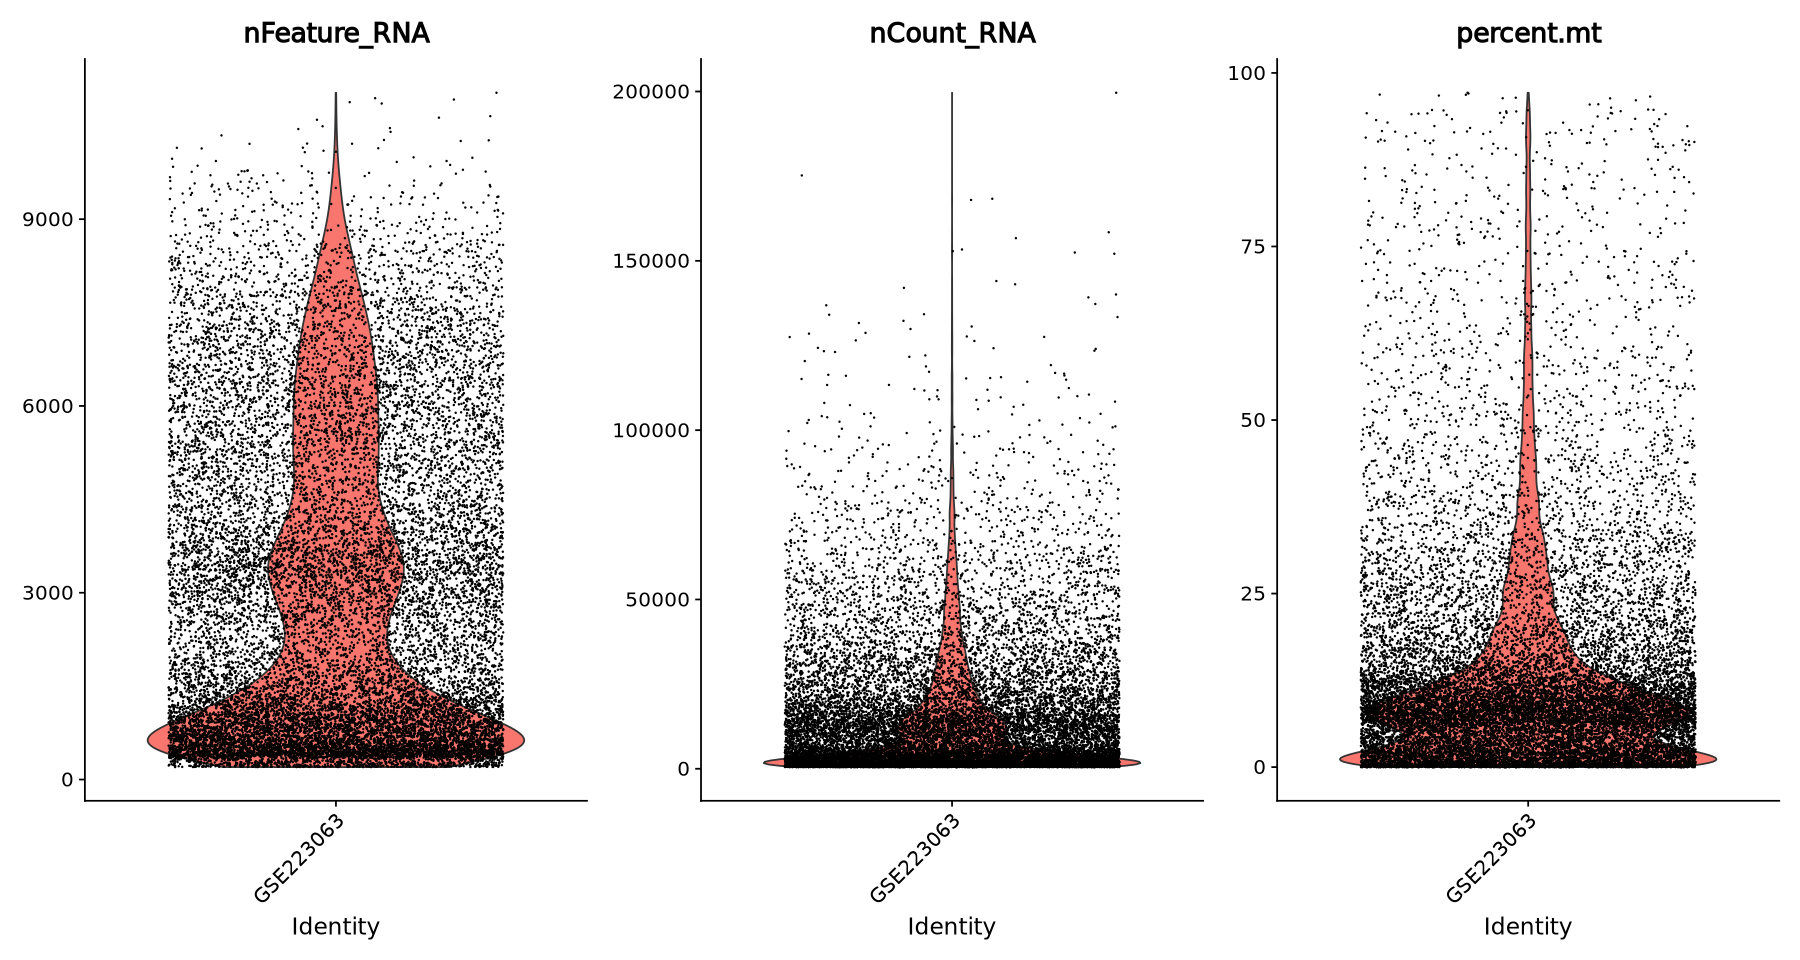

In [15]:
#QC Steps 
GLIO[["percent.mt"]] <- PercentageFeatureSet(GLIO, pattern = "^MT-")
#Visualise QC metrics
options(repr.plot.height=8, repr.plot.width=15)
VlnPlot(GLIO, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

In [16]:
#Normalise the data
GLIO <- NormalizeData(GLIO)
#Find variable features
GLIO <- FindVariableFeatures(GLIO, selection.method = "vst", nfeatures = 2000)
#Scale the data
GLIO <- ScaleData(GLIO, vars.to.regress = c("percent.mt", "nCount_RNA"))
#Run PCA
GLIO <- RunPCA(GLIO, features = VariableFeatures(object = GLIO))

Normalizing layer: counts.1

Normalizing layer: counts.2

Normalizing layer: counts.3

Normalizing layer: counts.4

Normalizing layer: counts.5

Normalizing layer: counts.6

Finding variable features for layer counts.1

Finding variable features for layer counts.2

Finding variable features for layer counts.3

Finding variable features for layer counts.4

Finding variable features for layer counts.5

Finding variable features for layer counts.6

Regressing out percent.mt, nCount_RNA

Centering and scaling data matrix

PC_ 1 
Positive:  MAP1B, MT3, TUBA1A, CLU, TUBB2B, SPARC, METRN, IGFBP2, TSC22D4, S100B 
	   CPE, PCSK1N, CAMK2N1, C1orf61, CALD1, FABP7, SPARCL1, CKB, TTYH1, SCRG1 
	   MARCKSL1, MT2A, GAP43, CADM2, KIF21A, SERPINE2, NES, LSAMP, NTRK2, CRYAB 
Negative:  CD74, SRGN, HLA-DRA, HLA-DRB1, HLA-DPA1, C1QB, C1QC, C1QA, MS4A7, HLA-DPB1 
	   LAPTM5, TYROBP, RNASET2, C3, CYBA, HLA-DQB1, PTPRC, RGS1, OLR1, CTSS 
	   HLA-DMA, CYBB, CD83, PLXDC2, HLA-DQA1, ITGB2, CCL3, ALOX5AP, FCGR3A

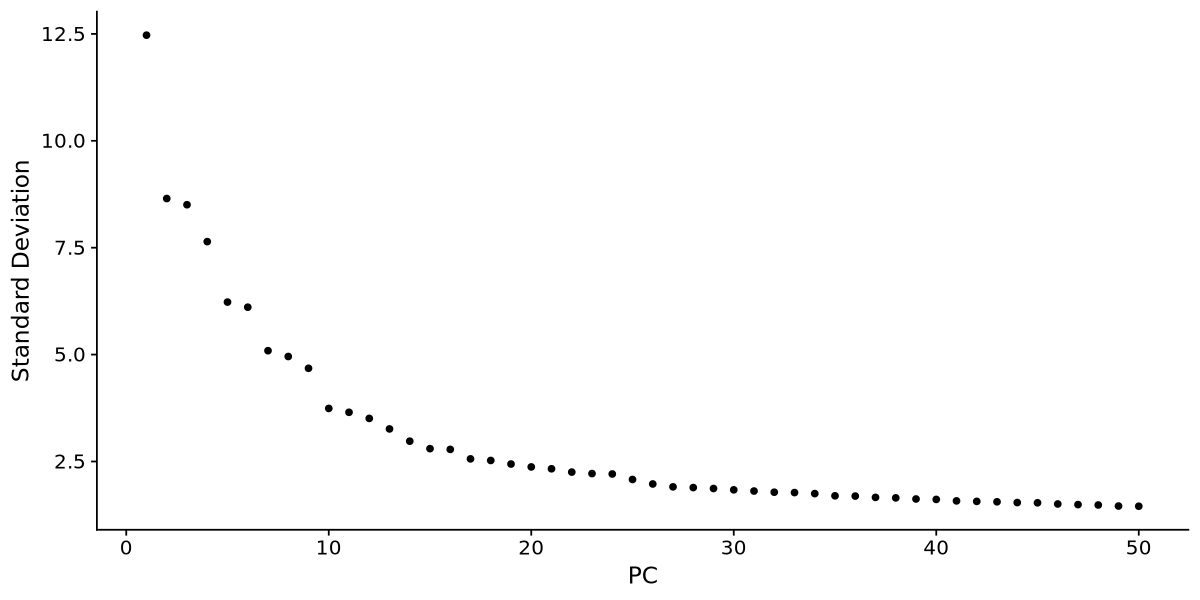

In [17]:
#make elbow plot
options(repr.plot.height=5, repr.plot.width=10)
ElbowPlot(GLIO, ndims=50)
#in GSE213243 decided to use 40 PC, staying consistent across datasets

In [18]:
#Find neighbours (make sure number matches no. features chosen above)
GLIO <- FindNeighbors(GLIO, dims = 1:40)

Computing nearest neighbor graph

Computing SNN



In [19]:
#Run UMAP
GLIO <- RunUMAP(GLIO, dims = 1:40)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
09:36:44 UMAP embedding parameters a = 0.9922 b = 1.112

09:36:44 Read 19234 rows and found 40 numeric columns

09:36:44 Using Annoy for neighbor search, n_neighbors = 30

09:36:44 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

09:36:46 Writing NN index file to temp file /scratch/temp/9421858/RtmpzA5toX/file1fd42339e80d3d

09:36:46 Searching Annoy index using 1 thread, search_k = 3000

09:36:50 Annoy recall = 100%

09:36:50 Commencing smooth kNN distance calibration using 1 thread
 with 

In [20]:
#Cluster, resolution here set to 0.2
GLIO <- FindClusters(GLIO, resolution = 0.2)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 19234
Number of edges: 686381

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9641
Number of communities: 19
Elapsed time: 2 seconds


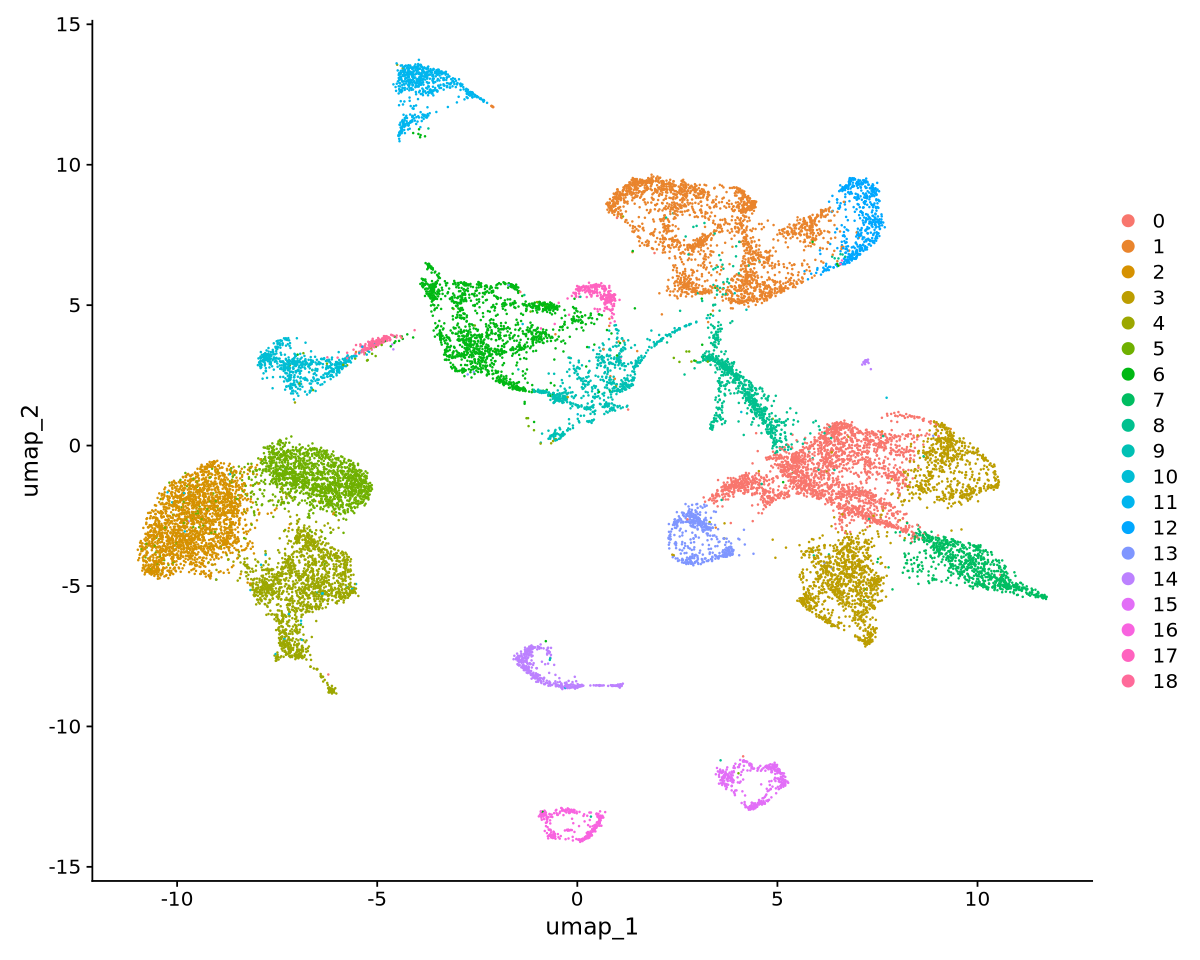

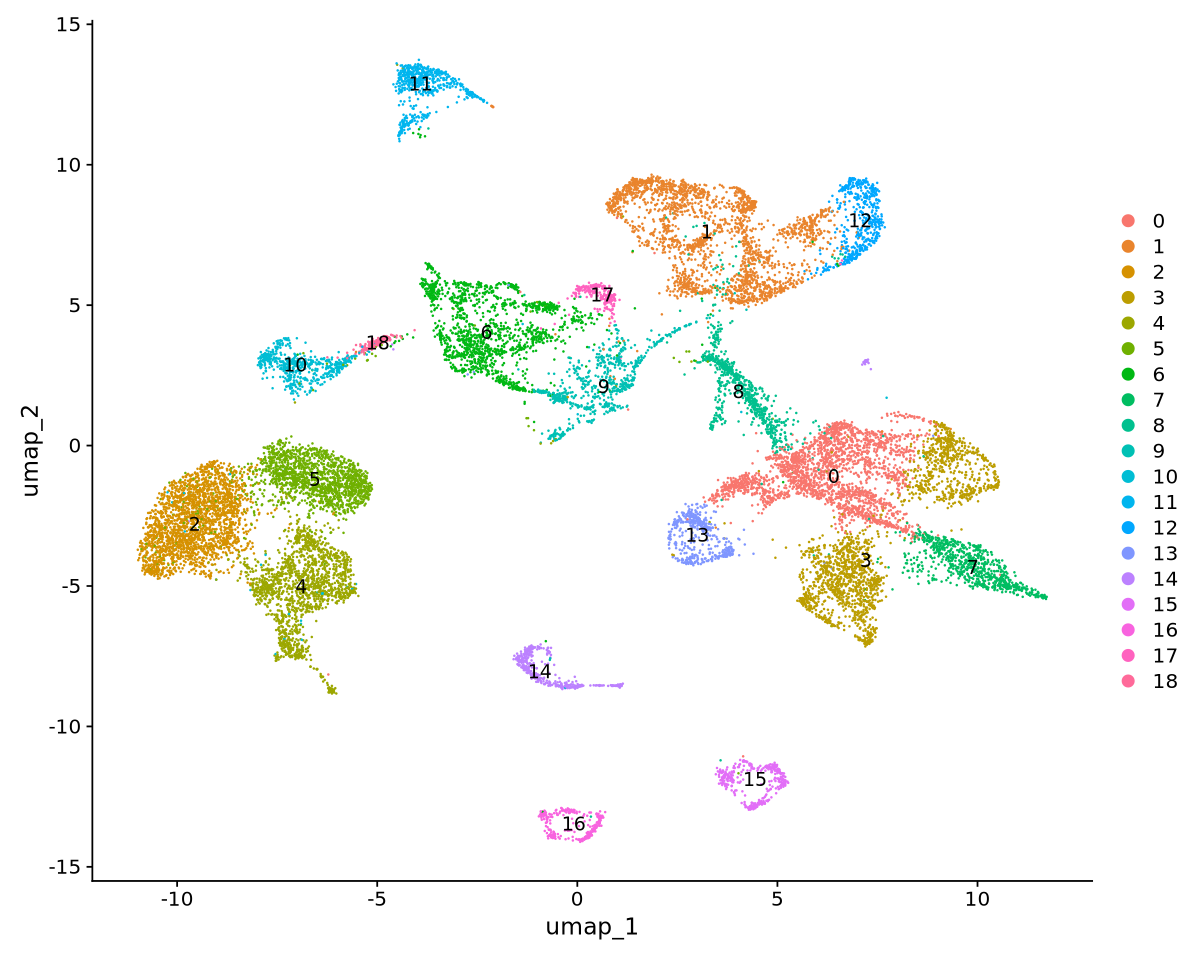

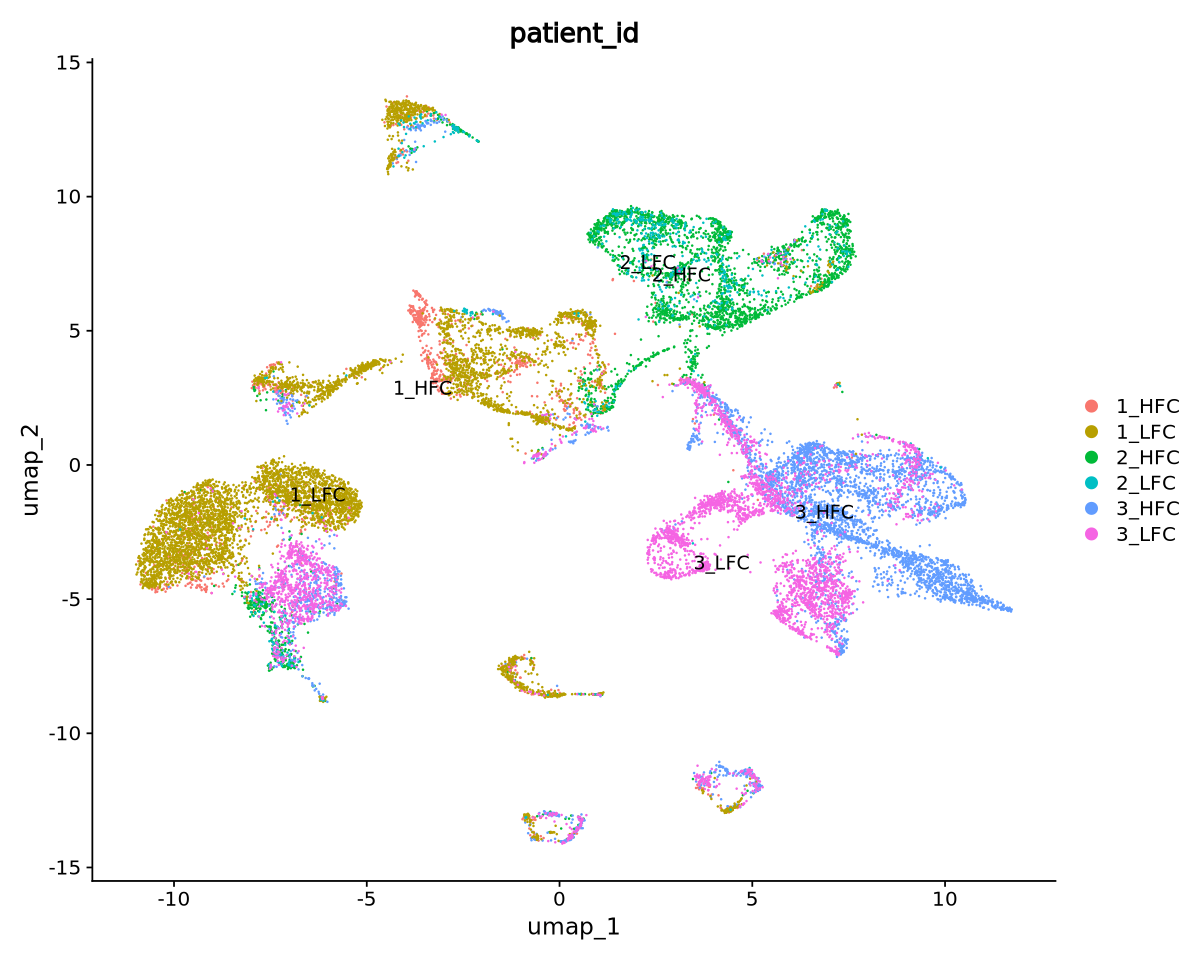

In [21]:
#Plot UMAP
options(repr.plot.height=8, repr.plot.width=10)
DimPlot(GLIO, reduction = "umap")
DimPlot(GLIO, reduction = "umap", label=TRUE)
DimPlot(GLIO, reduction = "umap", label=TRUE, group = "patient_id")

### populations quite different per patient, keep in mind below

In [22]:
#Save the object at this point so it can be loaded in without running steps above
saveRDS(GLIO, file = "/scratch/user/s4436039/scdata/GSE223063/GSE223063.RDS")

#### Next part of code is about determining which cluster is the myeloid cells

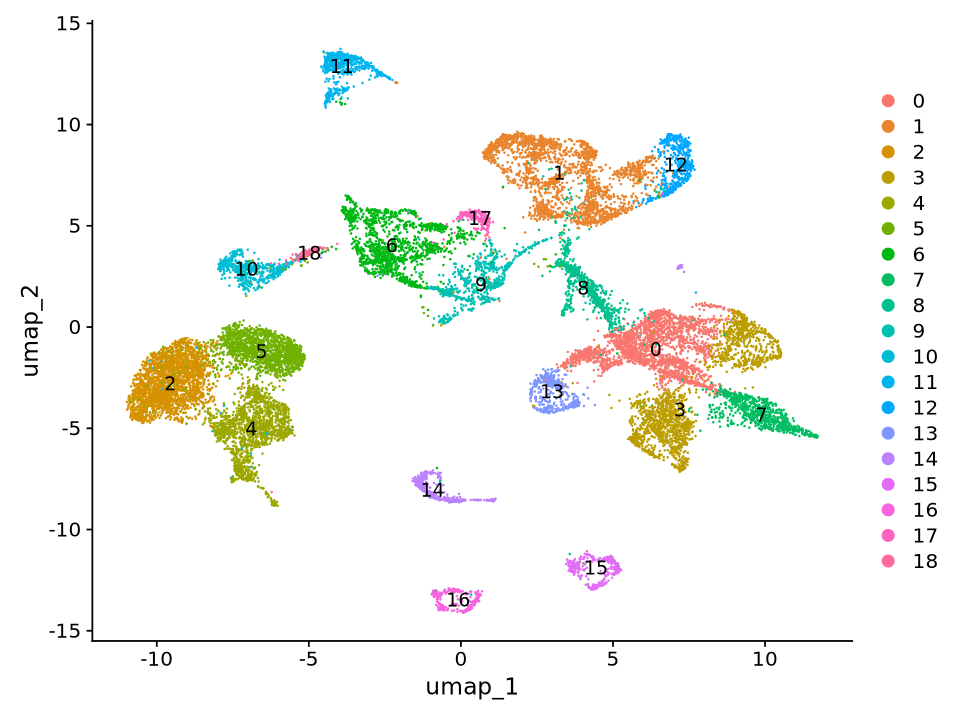

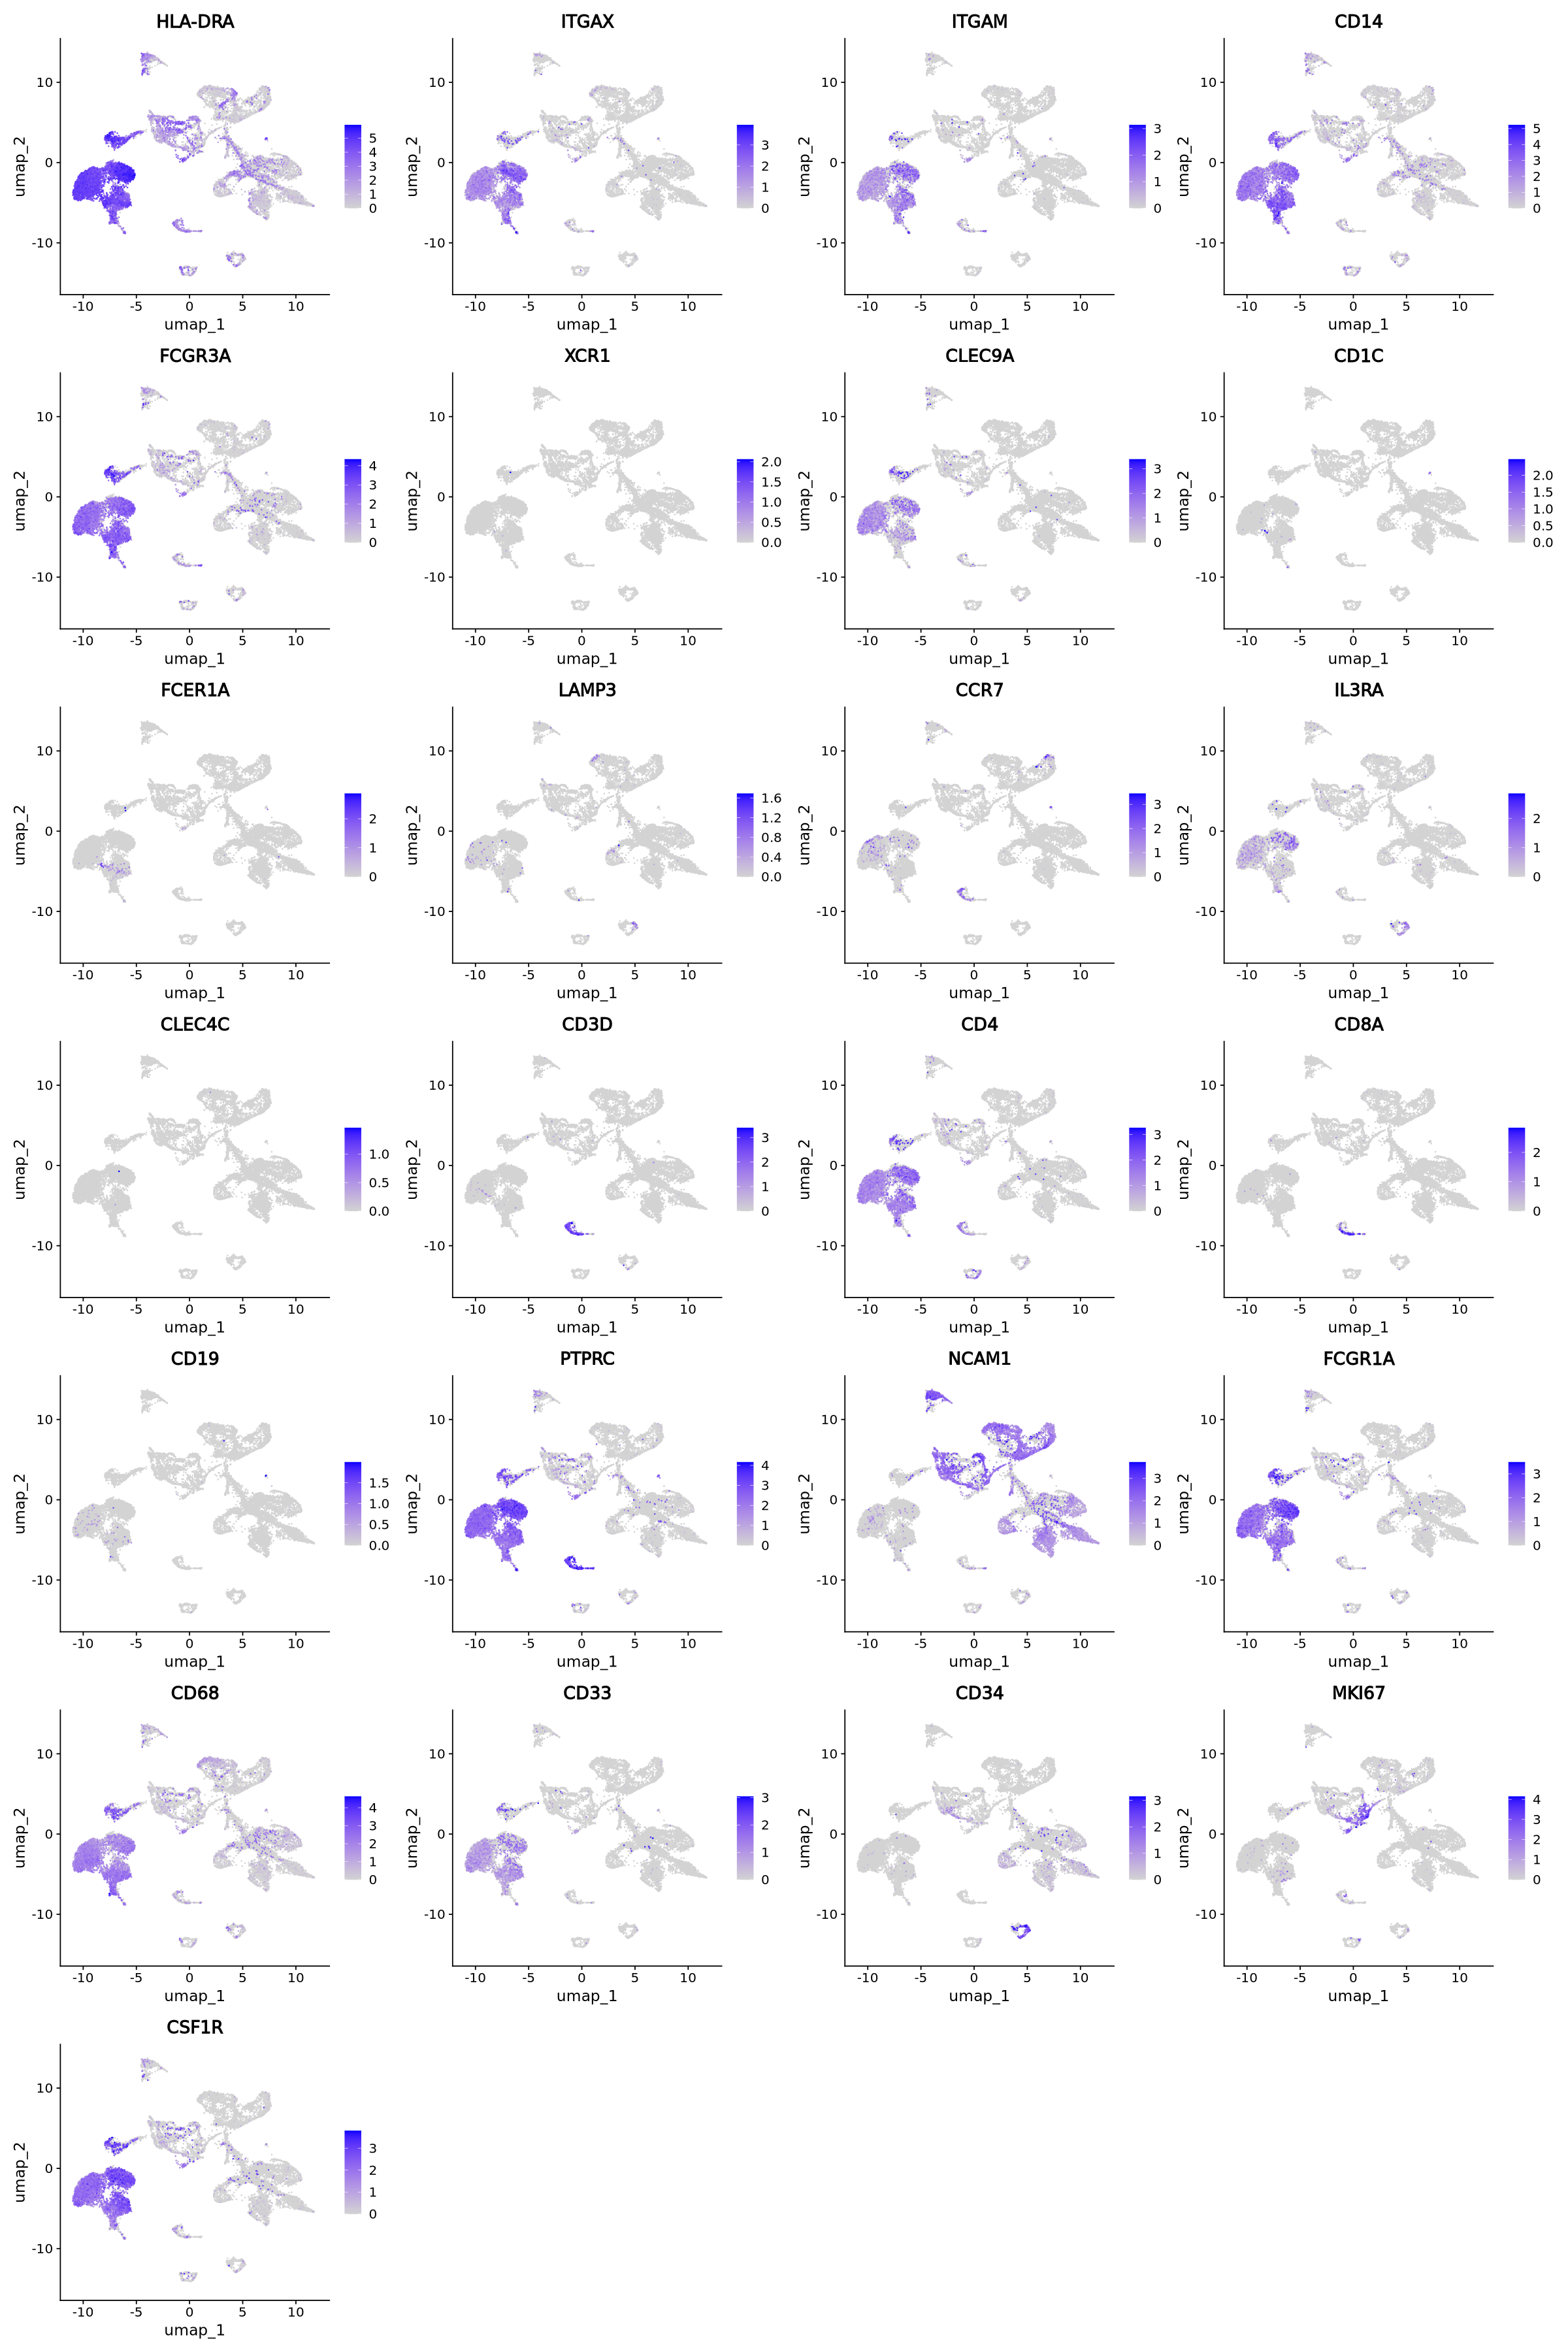

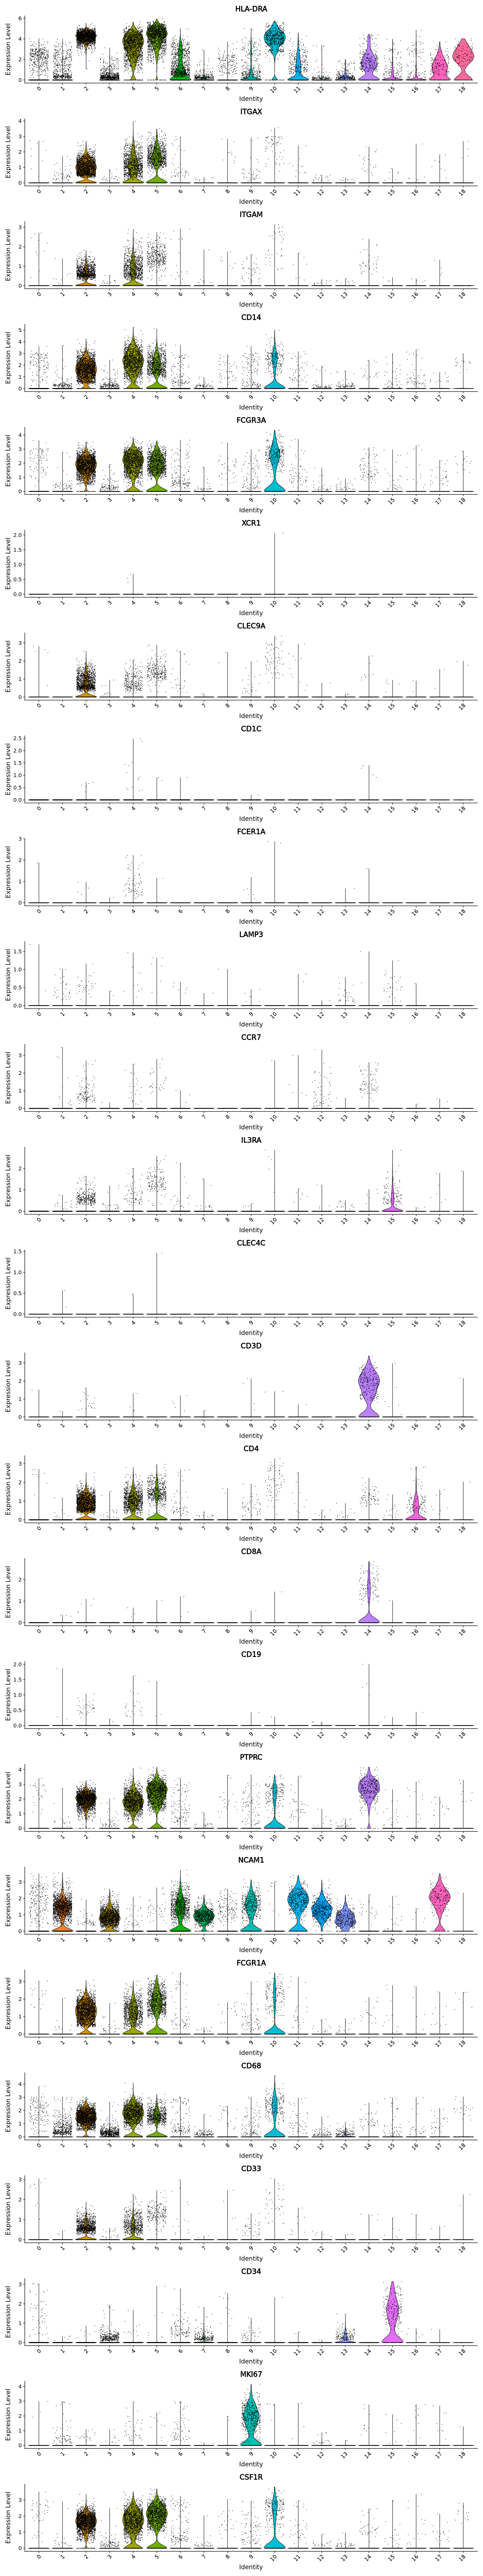

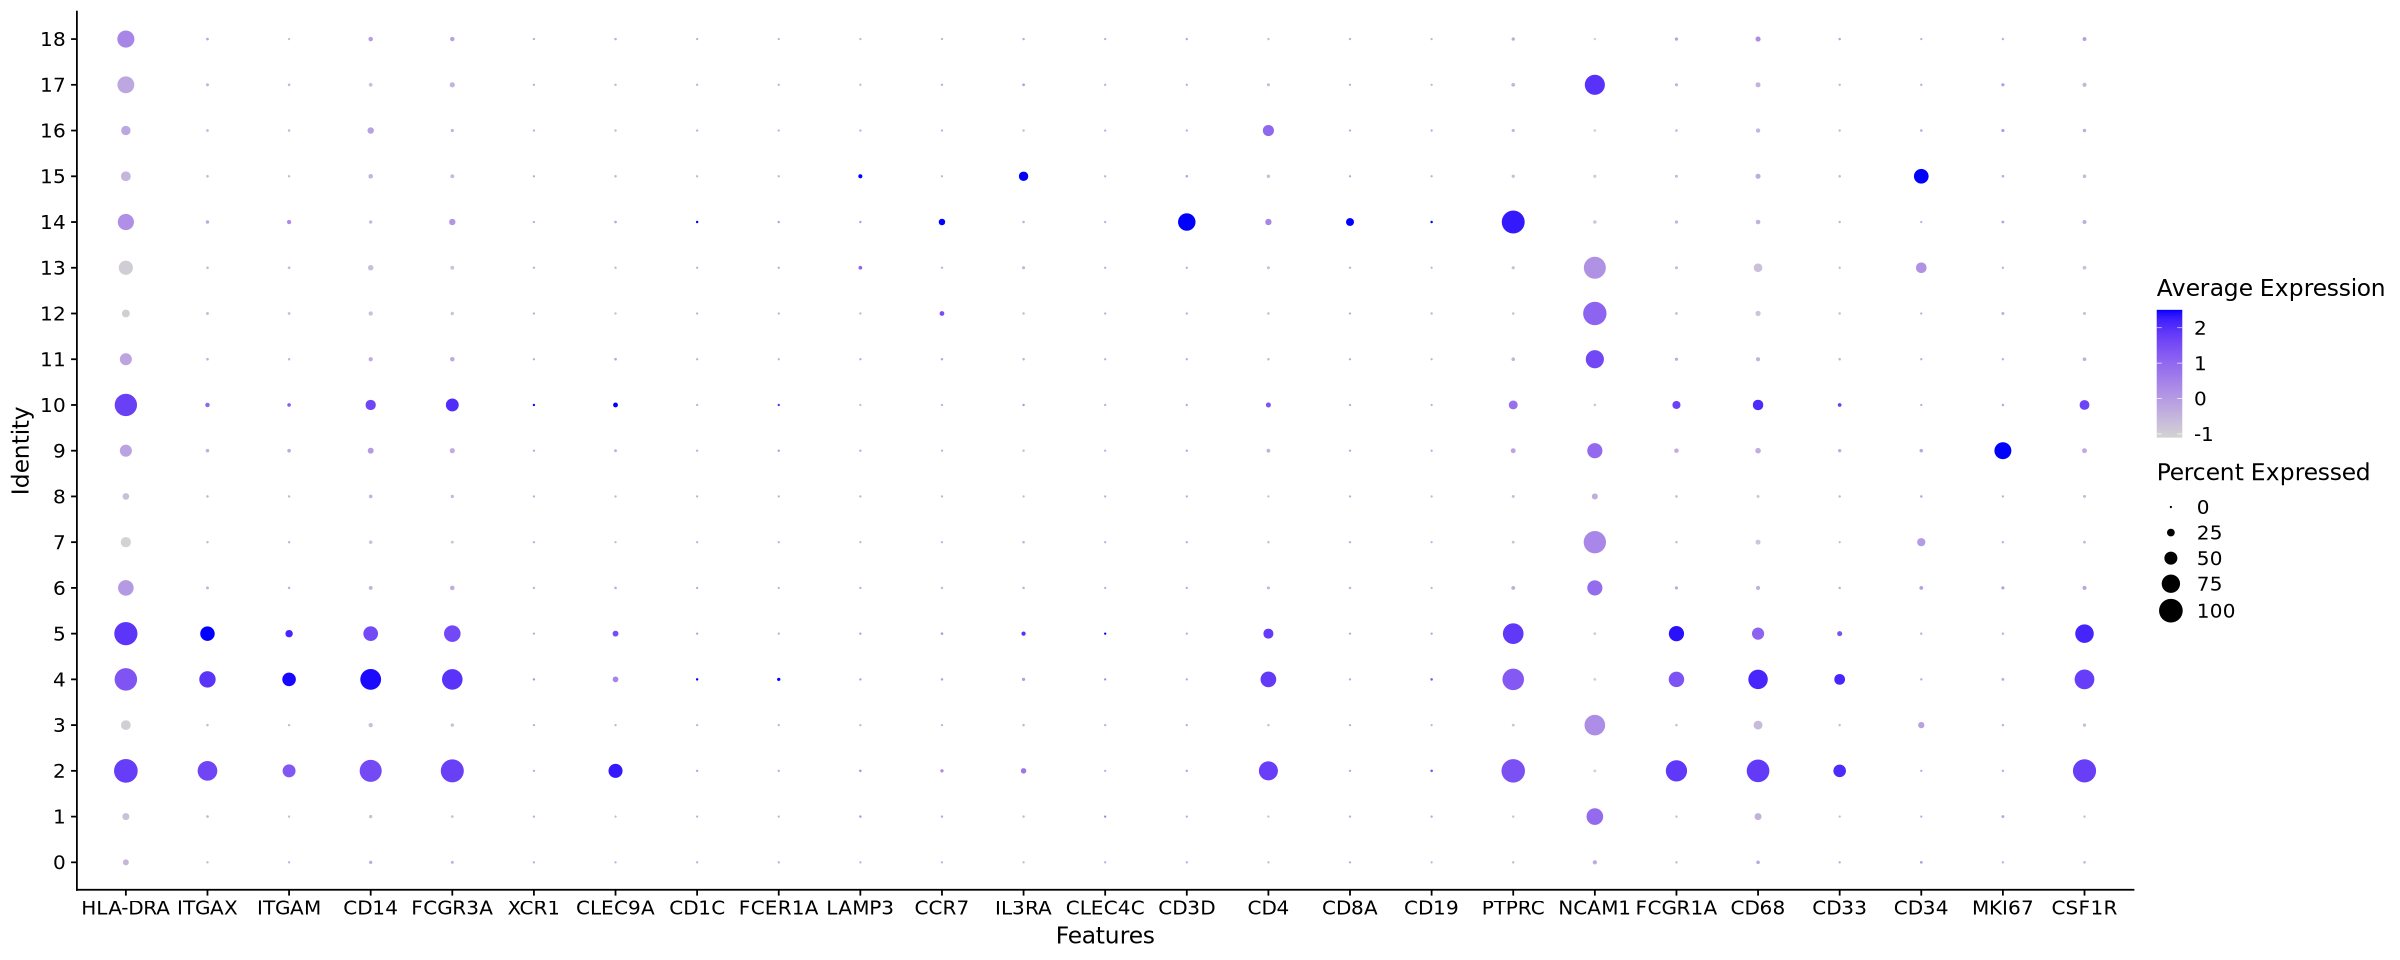

In [23]:
#Same genes over UMAP
options(repr.plot.height=6, repr.plot.width=8)
DimPlot(GLIO, reduction = "umap", label=TRUE)

options(repr.plot.height=30, repr.plot.width=20)
FeaturePlot(GLIO, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67", "CSF1R"), order = TRUE)

#Violin plots of classic markers
options(repr.plot.height=80, repr.plot.width=15)
VlnPlot(GLIO, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67", "CSF1R"), ncol=1)

#Same as above but dot plot
options(repr.plot.height=8, repr.plot.width=20)
DotPlot(GLIO, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67", "CSF1R"))

#### From above it looks like clusters 2,4,5,10,18 are the myeloid cells, now subsetting out these clusters

In [24]:
head(GLIO@meta.data)

orig.ident nCount_RNA nFeature_RNA
GSE223063_GLIO_HFC1_AAACCCAGTAACCCGC-1 GSE223063   8509      2336        
GSE223063_GLIO_HFC1_AAACGAACAGGCGTTC-1 GSE223063    526       376        
GSE223063_GLIO_HFC1_AAACGAACAGGTTCAT-1 GSE223063  22497      3943        
GSE223063_GLIO_HFC1_AAACGAAGTAGCTTAC-1 GSE223063  20003      5553        
GSE223063_GLIO_HFC1_AAACGAATCCATTGTT-1 GSE223063   5392      1606        
GSE223063_GLIO_HFC1_AAACGCTAGTAATTGG-1 GSE223063  21959      4275        
                                       sample_type cancer_type  patient_id
GSE223063_GLIO_HFC1_AAACCCAGTAACCCGC-1 tumour      Glioblastoma 1_HFC     
GSE223063_GLIO_HFC1_AAACGAACAGGCGTTC-1 tumour      Glioblastoma 1_HFC     
GSE223063_GLIO_HFC1_AAACGAACAGGTTCAT-1 tumour      Glioblastoma 1_HFC     
GSE223063_GLIO_HFC1_AAACGAAGTAGCTTAC-1 tumour      Glioblastoma 1_HFC     
GSE223063_GLIO_HFC1_AAACGAATCCATTGTT-1 tumour      Glioblastoma 1_HFC     
GSE223063_GLIO_HFC1_AAACGCTAGTAATTGG-1 tumour      Glioblastoma 1_HFC     
                                       sample_id      percent.mt
GSE223063_GLIO_HFC1_AAACCCAGTAACCCGC-1 GSE223063_HFC1 19.4970032
GSE223063_GLIO_HFC1_AAACGAACAGGCGTTC-1 GSE223063_HFC1  3.2319392
GSE223063_GLIO_HFC1_AAACGAACAGGTTCAT-1 GSE223063_HFC1  7.0542739
GSE223063_GLIO_HFC1_AAACGAAGTAGCTTAC-1 GSE223063_HFC1  2.1046843
GSE223063_GLIO_HFC1_AAACGAATCCATTGTT-1 GSE223063_HFC1  0.3523739
GSE223063_GLIO_HFC1_AAACGCTAGTAATTGG-1 GSE223063_HFC1  7.1633499
                                       RNA_snn_res.0.2 seurat_clusters
GSE223063_GLIO_HFC1_AAACCCAGTAACCCGC-1 5               5              
GSE223063_GLIO_HFC1_AAACGAACAGGCGTTC-1 6               6              
GSE223063_GLIO_HFC1_AAACGAACAGGTTCAT-1 2               2              
GSE223063_GLIO_HFC1_AAACGAAGTAGCTTAC-1 6               6              
GSE223063_GLIO_HFC1_AAACGAATCCATTGTT-1 10              10             
GSE223063_GLIO_HFC1_AAACGCTAGTAATTGG-1 2               2

In [25]:
myeloid_GLIO <- subset(GLIO, subset = RNA_snn_res.0.2 %in% c("2","4","5","10","18"))

In [27]:
GLIO
myeloid_GLIO

An object of class Seurat 
33538 features across 19234 samples within 1 assay 
Active assay: RNA (33538 features, 2000 variable features)
 13 layers present: counts.1, counts.2, counts.3, counts.4, counts.5, counts.6, data.1, data.2, data.3, data.4, data.5, data.6, scale.data
 2 dimensional reductions calculated: pca, umap

An object of class Seurat 
33538 features across 6298 samples within 1 assay 
Active assay: RNA (33538 features, 2000 variable features)
 13 layers present: counts.1, counts.2, counts.3, counts.4, counts.5, counts.6, data.1, data.2, data.3, data.4, data.5, data.6, scale.data
 2 dimensional reductions calculated: pca, umap

In [28]:
saveRDS(myeloid_GLIO, "/scratch/user/s4436039/scdata/GSE223063/GSE223063_myeloid.RDS")

#### Following the above then need to move entire GSE223063 folder from scratch to rdm
``` bash
rsync -azvhp /scratch/user/s4436039/scdata/GSE223063/ /QRISdata/Q5935/nikita/scdata/GSE223063
```